#Import the libraries

In [26]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

#Functions

##Accuracies function

In [28]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
  print('\nClassification Report:\n')
  print(classification_report(y_actual, y_predict))
  print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_actual, y_predict)
  print(cm)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

#Read the dataset

In [29]:
data = pd.read_csv("Assignment3_dataset (1).csv")

#1.Train test split

In [30]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [31]:
train_data = data.iloc[:576,:]
test_data = data.iloc[576:,:]

In [32]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0
...,...,...,...,...,...,...,...,...,...
571,0.117647,0.874372,0.721311,0.373737,0.141844,0.663189,0.242528,0.050000,1
572,0.352941,0.628141,0.622951,0.000000,0.000000,0.503726,0.018360,0.550000,1
573,0.529412,0.763819,0.639344,0.343434,0.202128,0.509687,0.347993,0.200000,1
574,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0


#Split to features and label

In [33]:
x_train = train_data.iloc[:,:-1]
x_test = test_data.iloc[:,:-1]

y_train = train_data.iloc[:,-1:]
y_test = test_data.iloc[:,-1:]

In [34]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333
...,...,...,...,...,...,...,...,...
571,0.117647,0.874372,0.721311,0.373737,0.141844,0.663189,0.242528,0.050000
572,0.352941,0.628141,0.622951,0.000000,0.000000,0.503726,0.018360,0.550000
573,0.529412,0.763819,0.639344,0.343434,0.202128,0.509687,0.347993,0.200000
574,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333


In [35]:
y_test

,Outcome
576,1
577,0
578,0
579,1
580,0
...,...
763,0
764,1
765,0
766,1


#Apply models

##Logistic Regression

In [36]:
LR_model = LogisticRegression()
LR_model = LR_model.fit(x_train, y_train)
y_pred_LR = LR_model.predict(x_test)

y_pred_LR

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

###Accuracies


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       127
           1       0.76      0.48      0.58        65

    accuracy                           0.77       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.77      0.75       192


Confusion Matrix:

[[117  10]
 [ 34  31]]

Accuracy Score:

0.7708333333333334
\Confusion Matrix Display:



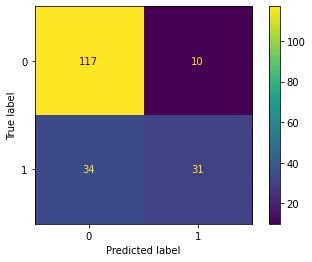

In [37]:
get_accuracies(y_test, y_pred_LR)

##K-Nearest Neighbor

In [38]:
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)

y_pred_KNN

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

###Accuracies


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       127
           1       0.65      0.57      0.61        65

    accuracy                           0.75       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.75      0.75       192


Confusion Matrix:

[[107  20]
 [ 28  37]]

Accuracy Score:

0.75
\Confusion Matrix Display:



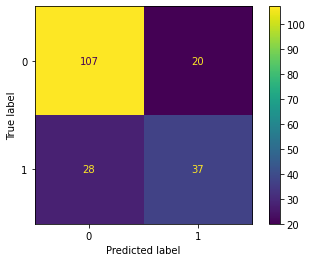

In [39]:
get_accuracies(y_test, y_pred_KNN)

# 2D TSNE plots 

In [40]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import random
import seaborn as sns

In [41]:
len(y_train)

576

In [42]:
def draw_tsne(n,data,label_data,title1):
  tsne = TSNE(n_components=n, random_state=0)
  X_2d = tsne.fit_transform(data)
  dftsne = pd.DataFrame(X_2d)
  dftsne['label'] = label_data 
  dftsne.columns = ['x1','x2','label']
  dftsne
  plt.figure(figsize=(6, 5))
  
  sns.scatterplot(data=dftsne,x='x2',y='x1',hue='label',legend="full",alpha=1).set(title=title1)


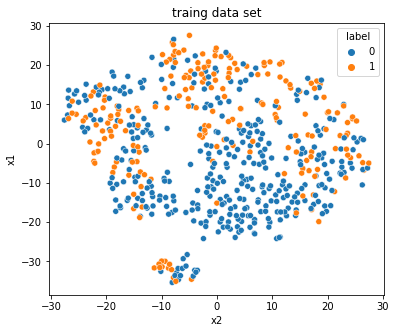

In [43]:
draw_tsne(2,x_train,y_train,'traing data set')

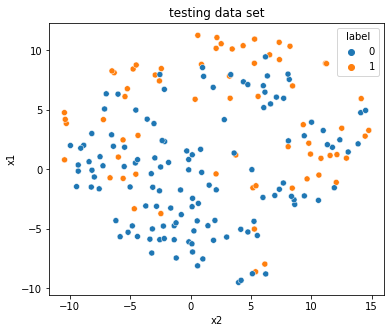

In [44]:
draw_tsne(2,x_test,np.array(y_test),'testing data set')

# Best number of cluster for k-means clustering algorithm

In [45]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve
from yellowbrick.cluster.elbow import kelbow_visualizer

In [46]:
def best_k(data1,range):
  model = kelbow_visualizer(KMeans(random_state=0), data1, k=(2,range),metric='silhouette',timings=False)  
  return model.elbow_value_ , model.elbow_score_
  



In [47]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333
...,...,...,...,...,...,...,...,...
763,0.000000,0.587940,0.655738,0.313131,0.062648,0.673621,0.004697,0.050000
764,0.705882,0.422111,0.590164,0.313131,0.000000,0.442623,0.093510,0.416667
765,0.352941,0.618090,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667
766,0.058824,0.984925,0.622951,0.363636,0.294326,0.543964,0.340307,0.133333


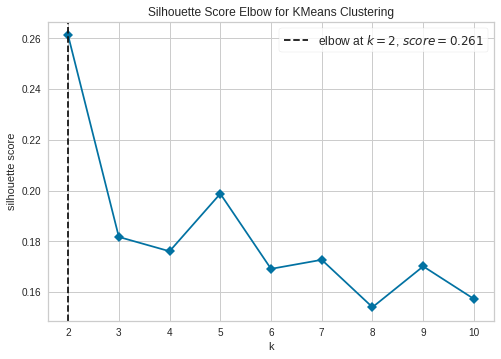

In [48]:
bk,score=best_k(X,11)

In [49]:
print("Best K value is ",bk," and its score is",score)

Best K value is  2  and its score is 0.26114611150604655


In [50]:
def PCA_function(data1,n_components=2):
  pca = PCA(n_components=n_components)
  PCA_reduction = pca.fit_transform(data1)
  return PCA_reduction

# Plot k_means cluster

In [51]:
def my_scater_plot(X,title ,centers =None, labels =None):
  fig, ax = plt.subplots(figsize=(9,5))
  x_axis = [o[0] for o in X]
  y_axis = [o[1] for o in X]
  ax.scatter(x_axis, y_axis, c=labels,cmap='viridis')
  ax.set_title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  if  centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7)
    plt.show()

In [52]:
pca_data=PCA_function(X)
kmeans = KMeans(n_clusters = bk ,init = 'k-means++', random_state = 0)
predicted_labels = kmeans.fit_predict(pca_data)

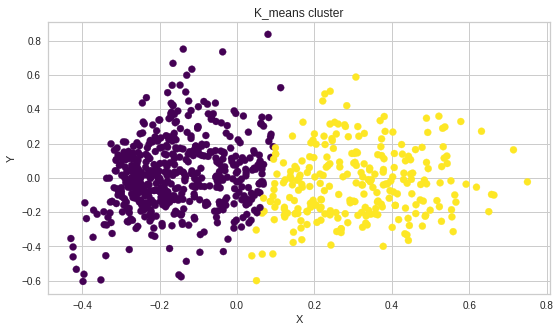

In [53]:
my_scater_plot(pca_data,'K_means cluster',labels=predicted_labels)

# Dimensionality Reduction

##PCA

Best value of n components for KNN:  3  with maximmum accuracy  77.08333333333334


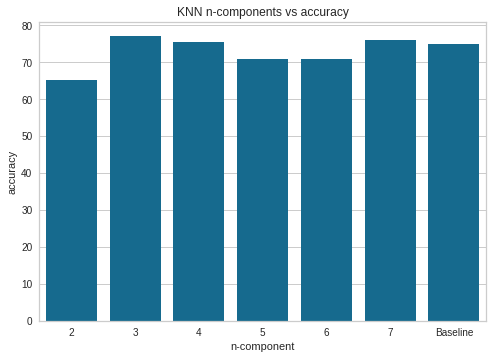

In [54]:
accuracy_dic_KNN={}
accuracy_list_KNN=[]
for i in range(2,8):
  pca_KNN=PCA_function(X,i)
  pca_x_train_KNN, pca_x_test_KNN, y_train_pca_knn, y_test_pca_knn = pca_KNN[0:576], pca_KNN[576:], Y[0:576], Y[576:]
  

  pca_KNN_model = KNeighborsClassifier()
  pca_KNN_model = KNN_model.fit(pca_x_train_KNN, y_train.values.ravel())
  pca_y_pred_KNN = KNN_model.predict(pca_x_test_KNN)

  accuracy_list_KNN.append(accuracy_score(y_test, pca_y_pred_KNN)*100)
best_n= accuracy_list_KNN.index(max(accuracy_list_KNN))+2
max_acc=max(accuracy_list_KNN)
print("Best value of n components for KNN: ",best_n," with maximmum accuracy ",max(accuracy_list_KNN))
accuracy_list_KNN.append(accuracy_score(y_test, y_pred_KNN)*100)
accuracy_dic_KNN={"n-component":[2,3,4,5,6,7,'Baseline'],"accuracy":accuracy_list_KNN}
accuracy_df_KNN=pd.DataFrame(accuracy_dic_KNN)
ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df_KNN,
             palette=["b" if x!=8 else 'r' for x in accuracy_df_KNN['n-component']]).set(title='KNN n-components vs accuracy')

In [55]:
accuracy_df_KNN

,n-component,accuracy
0,2,65.104167
1,3,77.083333
2,4,75.520833
3,5,70.833333
4,6,70.833333
5,7,76.041667
6,Baseline,75.000000


Best value of n components for LR:  7  with maximmum accuracy  78.64583333333334


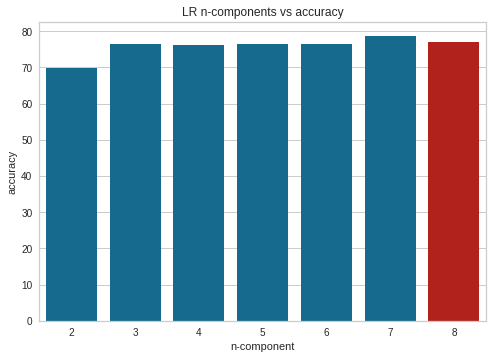

In [56]:
accuracy_dic={}
accuracy_listLR=[]
for i in range(2,8):
  pca_LR=PCA_function(X,i)
  pca_x_train_LR, pca_x_test_LR, y_train_pca_LR, y_test_pca_LR = pca_LR[0:576], pca_LR[576:], Y[0:576], Y[576:]
  
  pca_LR_model = LogisticRegression()
  pca_LR_model = pca_LR_model.fit(pca_x_train_LR, y_train.values.ravel())
  pca_y_pred_LR = pca_LR_model.predict(pca_x_test_LR)

  accuracy_listLR.append(accuracy_score(y_test, pca_y_pred_LR)*100)
best_n2= accuracy_listLR.index(max(accuracy_listLR))+2
max_acc2=max(accuracy_listLR)
print("Best value of n components for LR: ",best_n2," with maximmum accuracy ",max(accuracy_listLR))

accuracy_listLR.append(accuracy_score(y_test, y_pred_LR)*100)
accuracy_dic={"n-component":[2,3,4,5,6,7,8],"accuracy":accuracy_listLR}
accuracy_df=pd.DataFrame(accuracy_dic)
ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
             palette=["b" if x!=8 else 'r' for x in accuracy_df['n-component']]).set(title='LR n-components vs accuracy')

In [57]:
accuracy_df

,n-component,accuracy
0,2,69.791667
1,3,76.562500
2,4,76.041667
3,5,76.562500
4,6,76.562500
5,7,78.645833
6,8,77.083333


## TSNE plot

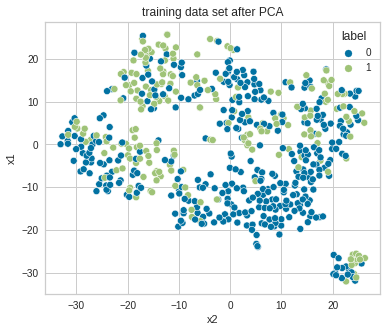

In [58]:
#LR
draw_tsne(2,PCA_function(x_train,7),y_train,'training data set after PCA')

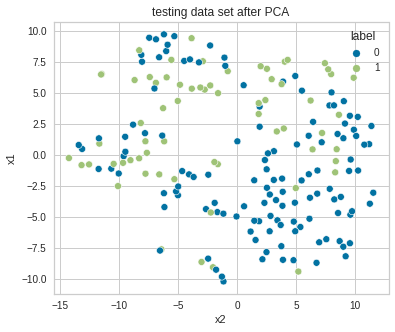

In [59]:
#LR
draw_tsne(2,PCA_function(x_test,7),np.array(y_test),'testing data set after PCA')

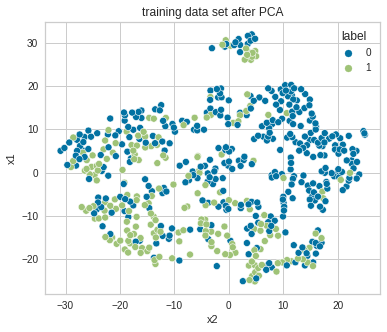

In [60]:
#KNN
draw_tsne(2,PCA_function(x_train,3),y_train,'training data set after PCA')

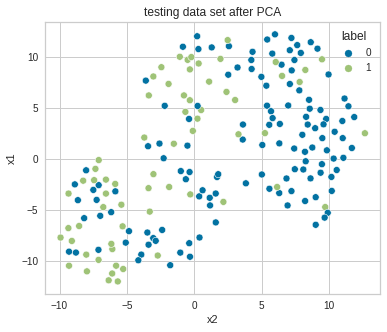

In [61]:
#KNN
draw_tsne(2,PCA_function(x_test,3),np.array(y_test),'testing data set after PCA')

# Feature Selection

In [62]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

In [63]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train.values.ravel())
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test) 
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100
  
  return acc

## Filter Method

In [64]:
def filter_selecton(x_train1, y_train1, x_test1, y_test1,  model_name,m):
  accuracy_dic={}
  accuracy_list=[]
  accuracy_list2=[]
  model = model_name
  for i in range(2,9):
    fsm =  SelectKBest(mutual_info_classif, k=i)
    acc = select_feature(x_train1, y_train1, x_test1, y_test1, fsm, model)
    accuracy_list.append(acc)

   
  print('max mutal',max(accuracy_list))
  best_n=accuracy_list.index(max(accuracy_list))+2
  print("Best value of n components: ",best_n, "from Mutual information for a discrete target filter method")
  if m=='LogisticRegression':
    accuracy_list.append(max_acc2)
  else:
    accuracy_list.append(max_acc)
  

  accuracy_dic={"n-component":[2,3,4,5,6,7,8,"PCA baseline"],"accuracy":accuracy_list}
  accuracy_df=pd.DataFrame(accuracy_dic)
  
  
  ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
              palette=["b" if x!='PCA baseline' else 'r' for x in accuracy_df['n-component']]).set(title=' Mutual information for a discrete target filter method '+m)
  

max mutal 78.64583333333334
Best value of n components:  4 from Mutual information for a discrete target filter method


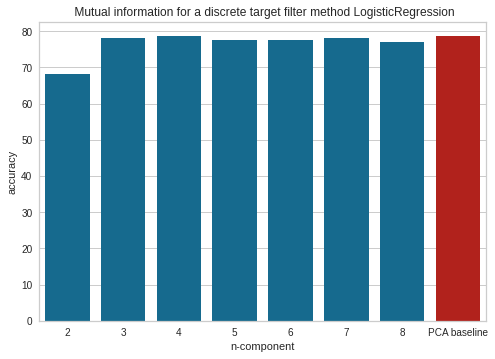

In [65]:
#LR
filter_selecton(x_train, y_train, x_test, y_test,  LogisticRegression(random_state=0),"LogisticRegression")

max mutal 77.08333333333334
Best value of n components:  3 from Mutual information for a discrete target filter method


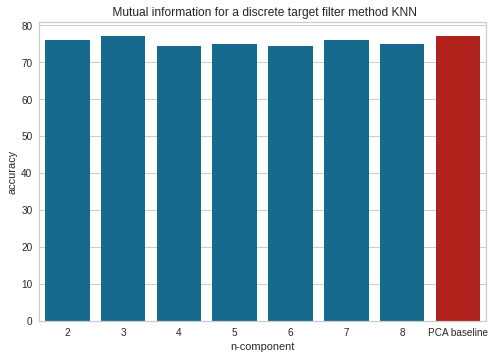

In [66]:
#KNN
filter_selecton(x_train, y_train, x_test, y_test,  KNeighborsClassifier(),"KNN")

## Wrapper Method

In [67]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [69]:
def wrapper_select_feature(X_train, y_train, X_test, y_test, label, model,i):
  fs = SFS(model,
           k_features=i,
           forward=label,
           verbose=2,
           scoring='roc_auc',
           cv=4)
  fs.fit(np.array(X_train), y_train.values.ravel())
  filtered_features= X_train.columns[list(fs.k_feature_idx_)]
  l=list(filtered_features)
  X_train_new = X_train.loc[:,l]
  X_test_new = X_test.loc[:,l]
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100
  
  return acc,X_train_new,X_test_new

In [70]:
def wrapper_selecton(x_train1, y_train1, x_test1, y_test1,  model_name,m):
  accuracy_dic={}
  accuracy_list=[]
  feat=[]
  feat_test=[]
  model = model_name
  for i in range(2,9):
    acc,df_X_train_new,df_X_test_new = wrapper_select_feature(x_train1, y_train1, x_test1, y_test1,True , model_name,i)
    accuracy_list.append(acc)
    feat.append(df_X_train_new)
    feat_test.append(df_X_test_new)
    index=accuracy_list.index(max(accuracy_list))
    feat_name=feat[index]
    test_name=feat_test[index]

    
  print(accuracy_list)
  print('max forward',max(accuracy_list))
  #print('list: ',feat_name)
  
  

  best_n=accuracy_list.index(max(accuracy_list))+2
  print("Best value of n components: ",best_n, "forward wrapper method")
  if m=='LogisticRegression':
    accuracy_list.append(max_acc2)
  else:
    accuracy_list.append(max_acc)
  
  #accuracy_list.append(accuracy_score(y_test, y_pred_LR))
  accuracy_dic={"n-component":[2,3,4,5,6,7,8,"PCA_Baseline"],"accuracy":accuracy_list}
  accuracy_df=pd.DataFrame(accuracy_dic)
  ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,palette=["b" if x!='PCA_Baseline' else 'r' for x in accuracy_df['n-component']]).set(title='feature selection using forward wrapper method for '+m)
  return feat_name,test_name,ax
  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-06-29 03:56:00] Features: 1/2 -- score: 0.6961256846595879[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-06-29 03:56:00] Features: 2/2 -- score: 0.762452320553021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-06-29 03:56:00] Features: 1/3 -- score: 0.6961256846595879[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

[73.95833333333334, 76.5625, 76.5625, 75.0, 74.47916666666666, 76.04166666666666, 75.0]
max forward 76.5625
Best value of n components:  3 forward wrapper method


[Text(0.5, 1.0, 'feature selection using forward wrapper method for KNN')]

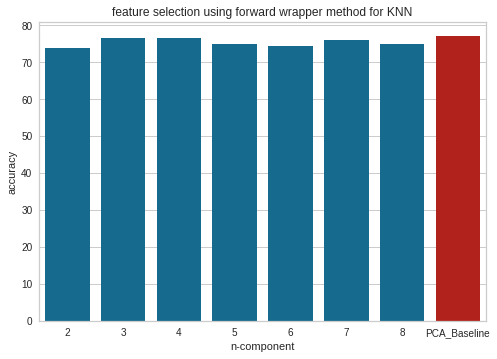

In [71]:
xforwardKNN=wrapper_selecton(x_train, y_train, x_test, y_test, KNeighborsClassifier(),'KNN')
xforwardKNN[2]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2022-06-29 03:56:03] Features: 1/2 -- score: 0.7811244398239735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2022-06-29 03:56:04] Features: 2/2 -- score: 0.80623147886471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2022-06-29 03:56:04] Features: 1/3 -- score: 0.7811244398239735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

[77.08333333333334, 78.64583333333334, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.60416666666666, 77.08333333333334]
max forward 78.64583333333334
Best value of n components:  3 forward wrapper method


[Text(0.5, 1.0, 'feature selection using forward wrapper method for LogisticRegression')]

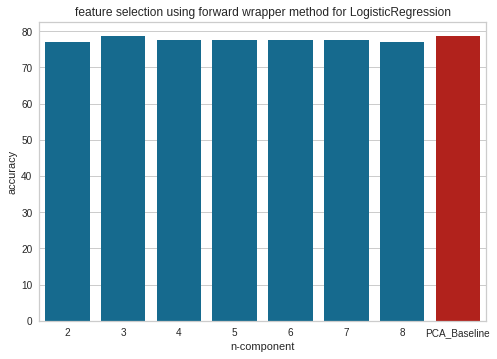

In [72]:
xforwardLR=wrapper_selecton(x_train, y_train, x_test, y_test, LogisticRegression(),"LogisticRegression") 
xforwardLR[2]

##Plot TSNE

In [73]:
xforwardLR[0]

,Pregnancies,Glucose,BMI
0,0.411765,0.623116,0.380030
1,0.294118,0.542714,0.538003
2,0.058824,0.437186,0.554396
3,0.058824,0.723618,0.687034
4,0.058824,0.557789,0.357675
...,...,...,...
571,0.117647,0.874372,0.663189
572,0.352941,0.628141,0.503726
573,0.529412,0.763819,0.509687
574,0.058824,0.467337,0.453055


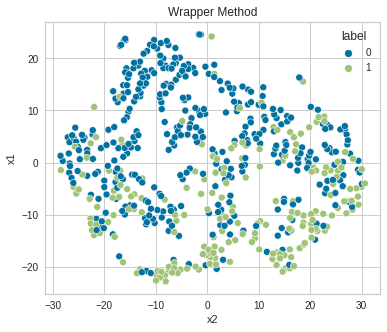

In [74]:
#LR
draw_tsne(2,xforwardLR[0],y_train,'Wrapper Method')

In [75]:
xforwardLR[1]

,Pregnancies,Glucose,BMI
576,0.000000,0.537688,0.545455
577,0.000000,0.522613,0.414307
578,0.176471,0.482412,0.368107
579,0.411765,0.974874,0.535022
580,0.058824,0.477387,0.385991
...,...,...,...
763,0.000000,0.587940,0.673621
764,0.705882,0.422111,0.442623
765,0.352941,0.618090,0.500745
766,0.058824,0.984925,0.543964


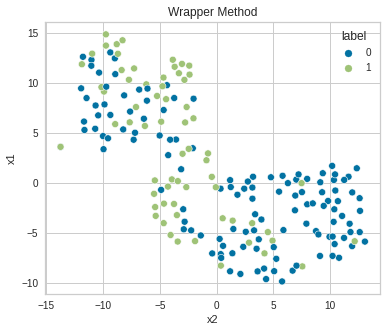

In [76]:
#LR
draw_tsne(2,xforwardLR[1],np.array(y_test),'Wrapper Method')

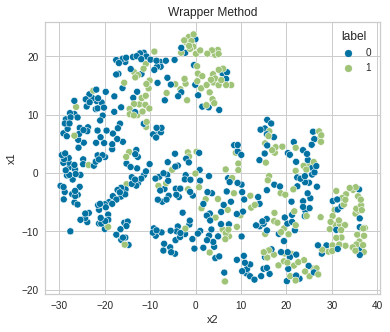

In [77]:
#KNN
draw_tsne(2,xforwardKNN[0],y_train,'Wrapper Method')

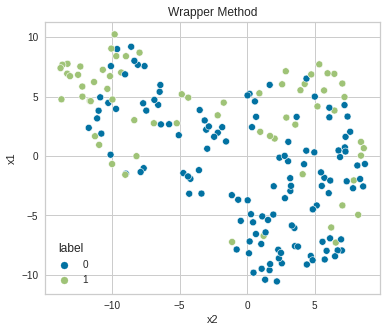

In [78]:
#KNN
draw_tsne(2,xforwardKNN[1],np.array(y_test),'Wrapper Method')

# choose best k from DR

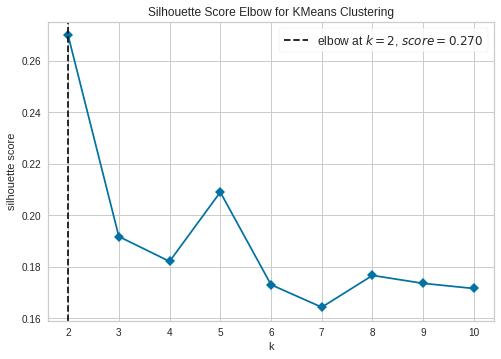

(2, 0.2698891486952815)

In [79]:
best_k(PCA_function(X,7),11)

#Som

##Best n components from PCA Q3

In [80]:
x_best_pca = PCA_function(X,n_components=3)

In [81]:
x_best_pca.shape

(768, 3)

In [82]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=558300af104b5a6a3967f04b953448ae937d2113948aecb1e65862d146347238
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


##Loop through 30 neurons

In [83]:
from minisom import MiniSom
def minisom_sil(data, dim):
  s = []
  for i in range(2,31):
    som_shape = (i, 1)
    som = MiniSom(som_shape[0], som_shape[1],dim, random_seed=0)
    som.train_batch(data, 1000)
    # each neuron represents a cluster
    winner_coordinates = np.array([som.winner(x) for x in data]).T
    # with np.ravel_multi_index we convert the bidimensional
    # coordinates to a monodimensional index
    cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
    s.append(silhouette_score(data, cluster_index))
  best_k(data, 31)


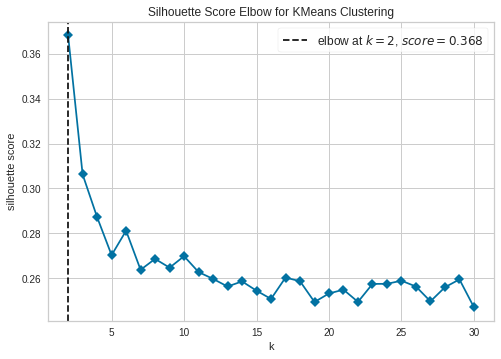

In [84]:
minisom_sil(x_best_pca, 3)

##Initial and Final weights

In [85]:
from minisom import MiniSom
som_shape = (2, 1)
som = MiniSom(som_shape[0], som_shape[1],3, random_seed=0)
initial_weights = som.get_weights().copy()
som.train_batch(np.array(x_best_pca), 1000)
final_weights = som.get_weights().copy()

winner_coordinates = np.array([som.winner(x) for x in np.array(x_best_pca)]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [86]:
initial_weights

array([[[ 0.20053839,  0.88405308,  0.42217829]],

       [[ 0.26298257, -0.44732694,  0.8548326 ]]])

In [87]:
final_weights

array([[[ 0.30397215, -0.03699393, -0.03066724]],

       [[-0.15368857, -0.13045023, -0.09615449]]])

In [88]:
final_weights = final_weights.reshape(2,3)
initial_weights = initial_weights.reshape(2,3)

In [89]:
initial_weights

array([[ 0.20053839,  0.88405308,  0.42217829],
       [ 0.26298257, -0.44732694,  0.8548326 ]])

##Plot initial weight

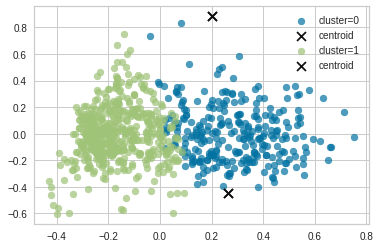

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
  plt.scatter(np.array(x_best_pca)[cluster_index == c, 0],
                np.array(x_best_pca)[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
  plt.scatter(initial_weights[:,0], initial_weights[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

##Plot final weight

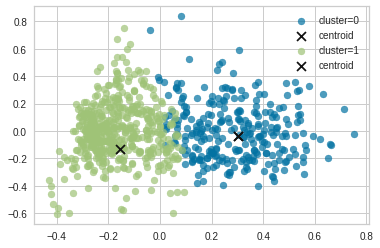

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
  plt.scatter(np.array(x_best_pca)[cluster_index == c, 0],
                np.array(x_best_pca)[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
  plt.scatter(final_weights[:,0], final_weights[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

#DBSCAN

##Tune hyperparameters

In [92]:
from sklearn.cluster import DBSCAN
clusters_2 = []
epsilon_ = np.linspace(0.3, 0.7, 50).tolist()
minpoints_ = np.arange(2, 16).tolist()

for i in epsilon_:
  for j in minpoints_:
   
    model = DBSCAN(eps=i, min_samples=j).fit(X)
    Clusters = list(np.unique(model.labels_))
    DB_Predict = model.fit_predict(X)
    if -1 in Clusters:
      Clusters.remove(-1)       #filer the noise 
    # print(len(num_clusters))           
    # print(num_clusters)  
    

    if len(Clusters) == 2:        
      list1.append((len(Clusters),
                i,
                j,
                silhouette_score(X ,DB_Predict, random_state=0)))
      
      clusters_2.extend(list1)
    
    list1 = []


##Cluster equal to 2

In [93]:
clusters_2

[(2, 0.3, 7, 0.2556904161964435),
 (2, 0.3, 8, 0.25546474322586743),
 (2, 0.3, 9, 0.24137344308832875),
 (2, 0.3, 10, 0.23483043771877876),
 (2, 0.3, 11, 0.2316717576500665),
 (2, 0.3, 12, 0.22396659495876217),
 (2, 0.3081632653061224, 7, 0.25987750594092096),
 (2, 0.3081632653061224, 8, 0.25862840946323973),
 (2, 0.3081632653061224, 9, 0.24539686557900464),
 (2, 0.3081632653061224, 10, 0.2413854364589287),
 (2, 0.3081632653061224, 11, 0.2385934650469905),
 (2, 0.3081632653061224, 12, 0.22794135037547522),
 (2, 0.31632653061224486, 7, 0.2665390054816948),
 (2, 0.31632653061224486, 8, 0.26320528081766703),
 (2, 0.31632653061224486, 9, 0.25411009681978675),
 (2, 0.31632653061224486, 10, 0.25321756565866105),
 (2, 0.31632653061224486, 11, 0.24578786743510048),
 (2, 0.31632653061224486, 12, 0.2424311067857413),
 (2, 0.31632653061224486, 13, 0.23260034879951866),
 (2, 0.32448979591836735, 3, 0.30164759204361596),
 (2, 0.32448979591836735, 4, 0.30164759204361596),
 (2, 0.32448979591836735, 5

##Filtering clusters based on Silhouette score

In [94]:
from operator import itemgetter

top_sil = sorted(clusters_2, key = itemgetter(3), reverse = True)
top_sil_df = pd.DataFrame(top_sil, columns = ["Cluster_num", "Epsilon", "Minpoints", "Silhouette"])
top_sil_df[:10]

,Cluster_num,Epsilon,Minpoints,Silhouette
0,2,0.446939,2,0.427027
1,2,0.430612,2,0.416000
2,2,0.422449,2,0.413268
3,2,0.414286,2,0.407059
4,2,0.438776,2,0.400058
5,2,0.332653,3,0.310725
6,2,0.332653,4,0.310725
7,2,0.340816,6,0.310229
8,2,0.332653,5,0.308900
9,2,0.332653,6,0.308900


##Plot top 10 epsilon vs number of clusters

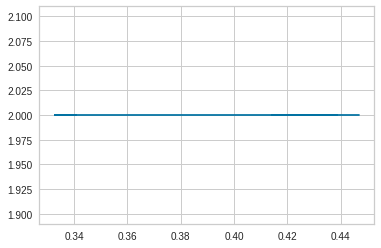

In [95]:
plt.plot(top_sil_df.iloc[:10,1], top_sil_df.iloc[:10,0])
plt.show()

##Plot top 10 minpoints vs number of clusters

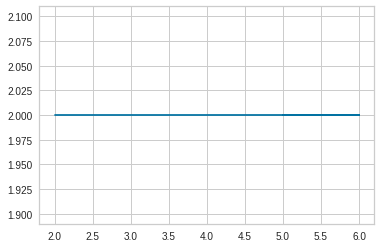

In [96]:
plt.plot(top_sil_df.iloc[:10,2], top_sil_df.iloc[:10,0])
plt.show()